# Quick exploration with EDA-5 mini dataset - Mosaic of ~100x100 chunks

In [1]:
import os
import json 
import subprocess
import importlib

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe

import xbitinfo as xb
import xarray as xr

import utils

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

---

In [36]:
# load data
path_to_data = 'data/hurricane-dorian.nc'  # change this
ds = xr.open_dataset(path_to_data)

ds = ds.drop('tp')
ds = ds.isel(time=15)
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2019-09-01T15:00:00
Data variables:
    sp         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-12 13:24:26 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [36]:
# load data
path_to_data = 'data/hurricane-dorian.nc'  # change this
ds = xr.open_dataset(path_to_data)

ds = ds.drop('tp')
ds = ds.isel(time=15)
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2019-09-01T15:00:00
Data variables:
    sp         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-12 13:24:26 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

<Axes: title={'center': 'Statistical distributions'}, xlabel='value', ylabel='Probability density'>

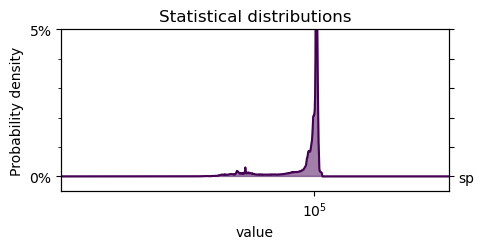

In [37]:
xb.plot_distribution(ds)

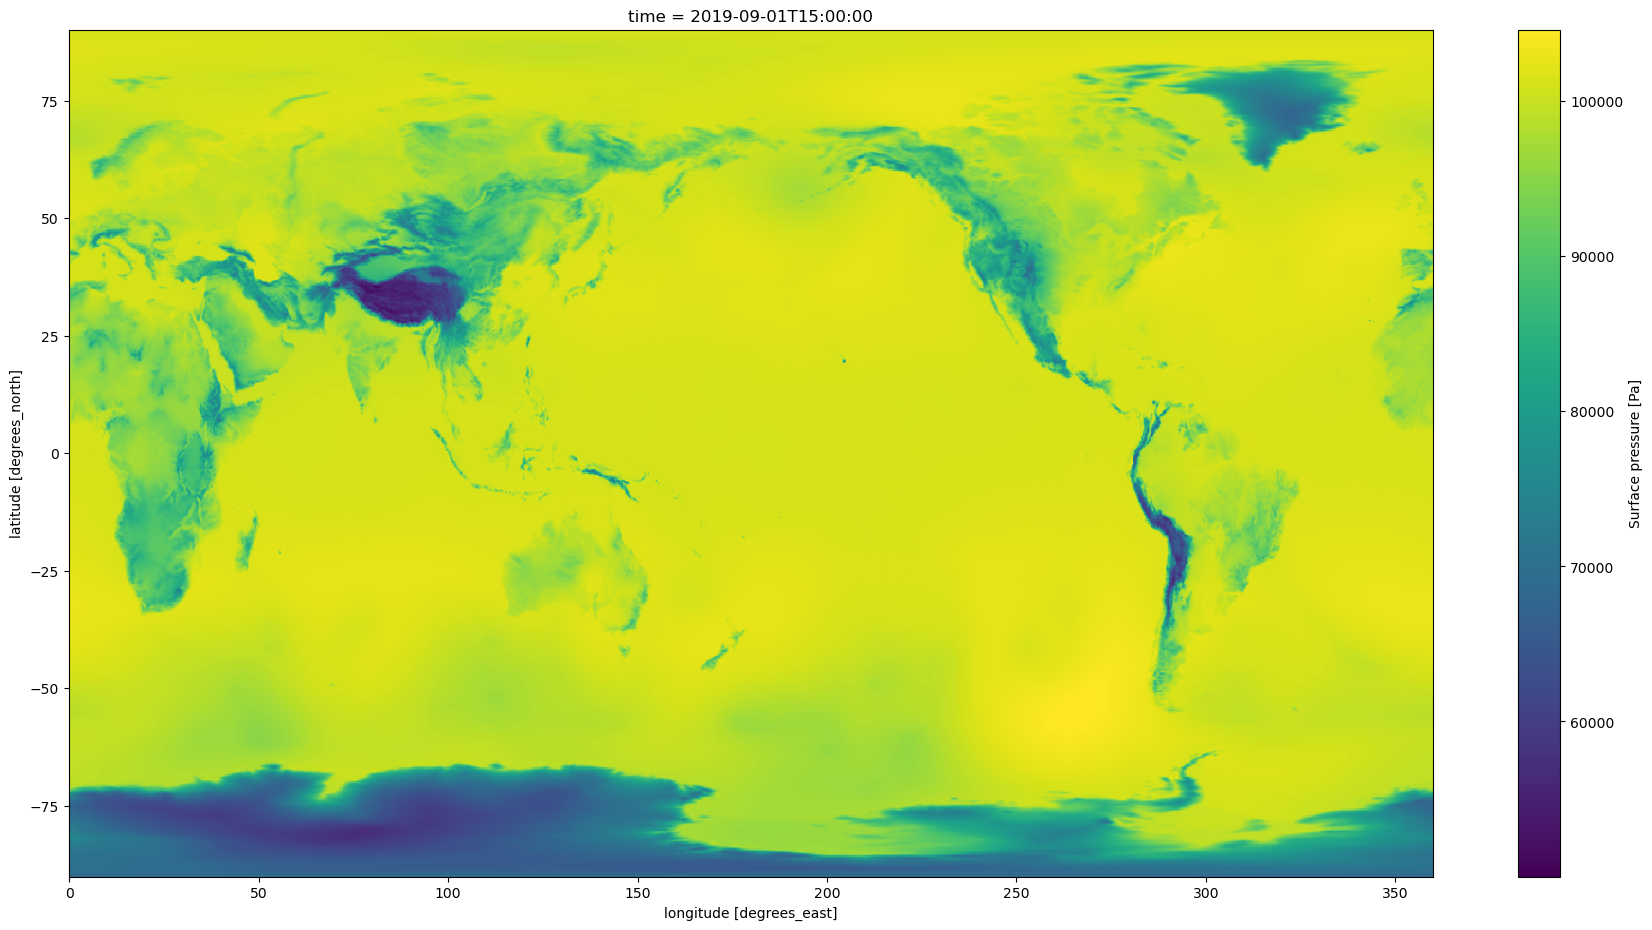

In [38]:
fig, ax = plt.subplots(figsize=(22, 11))
ds['sp'].plot(ax=ax)

In [25]:
# get information content per bit
info_per_bit = xb.get_bitinformation(ds, dim="latitude", implementation="python")

  0%|          | 0/1 [00:00<?, ?it/s]

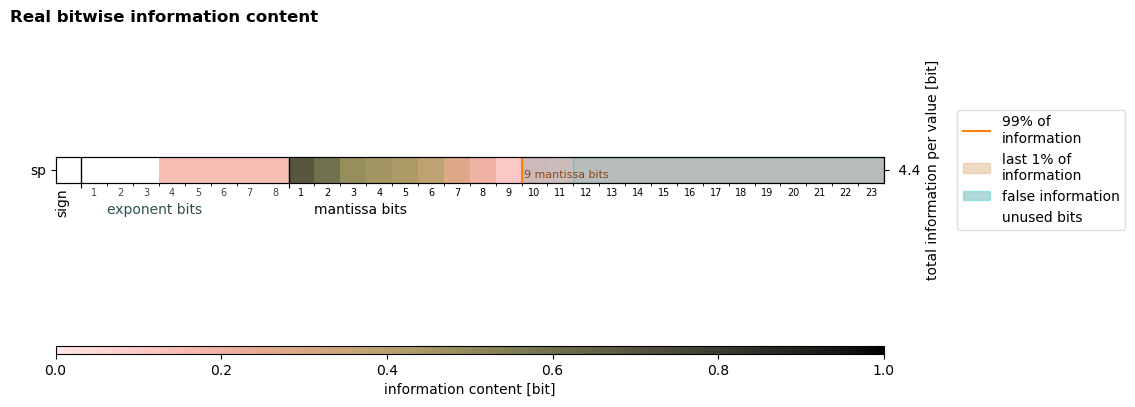

In [26]:
fig = xb.plot_bitinformation(info_per_bit)

In [27]:
# get keepbits
keepbits = xb.get_keepbits(info_per_bit, 0.99)

In [28]:
# apply bitrounding
ds_bitrounded = xb.xr_bitround(ds, keepbits)

---

In [29]:
at_least_zero = lambda x: max(x, 0)

In [30]:
chunk_long, chunk_lat = [120, 103] # for int division
vrbs = ['longitude', 'latitude']
var = 'latitude'

dss = []
dss_bitrounded = []
dss_kbits = []

long_c = int(ds.longitude.size / chunk_long)
lat_c = int(ds.latitude.size / chunk_lat)


for i in range(long_c):
    for j in range(lat_c):
        temp_ds = ds.isel(longitude=slice(i*chunk_long, (i+1)*chunk_long),
                          latitude=slice(j*chunk_lat, (j+1)*chunk_lat))
        dss.append(temp_ds)
        temp_info_pbit = xb.get_bitinformation(temp_ds, dim=var, implementation="python")
        # fig = xb.plot_bitinformation(temp_info_pbit)
        temp_keepbits = xb.get_keepbits(temp_info_pbit, 0.99)
        # cope with negative keepbits
        temp_keepbits = temp_keepbits.map(at_least_zero)
        dss_kbits.append(temp_keepbits)
        temp_ds_bitrounded = xb.xr_bitround(temp_ds, temp_keepbits)
        dss_bitrounded.append(temp_ds_bitrounded)
        
    #     if j == 0: break
    # if i == 0: break

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

---

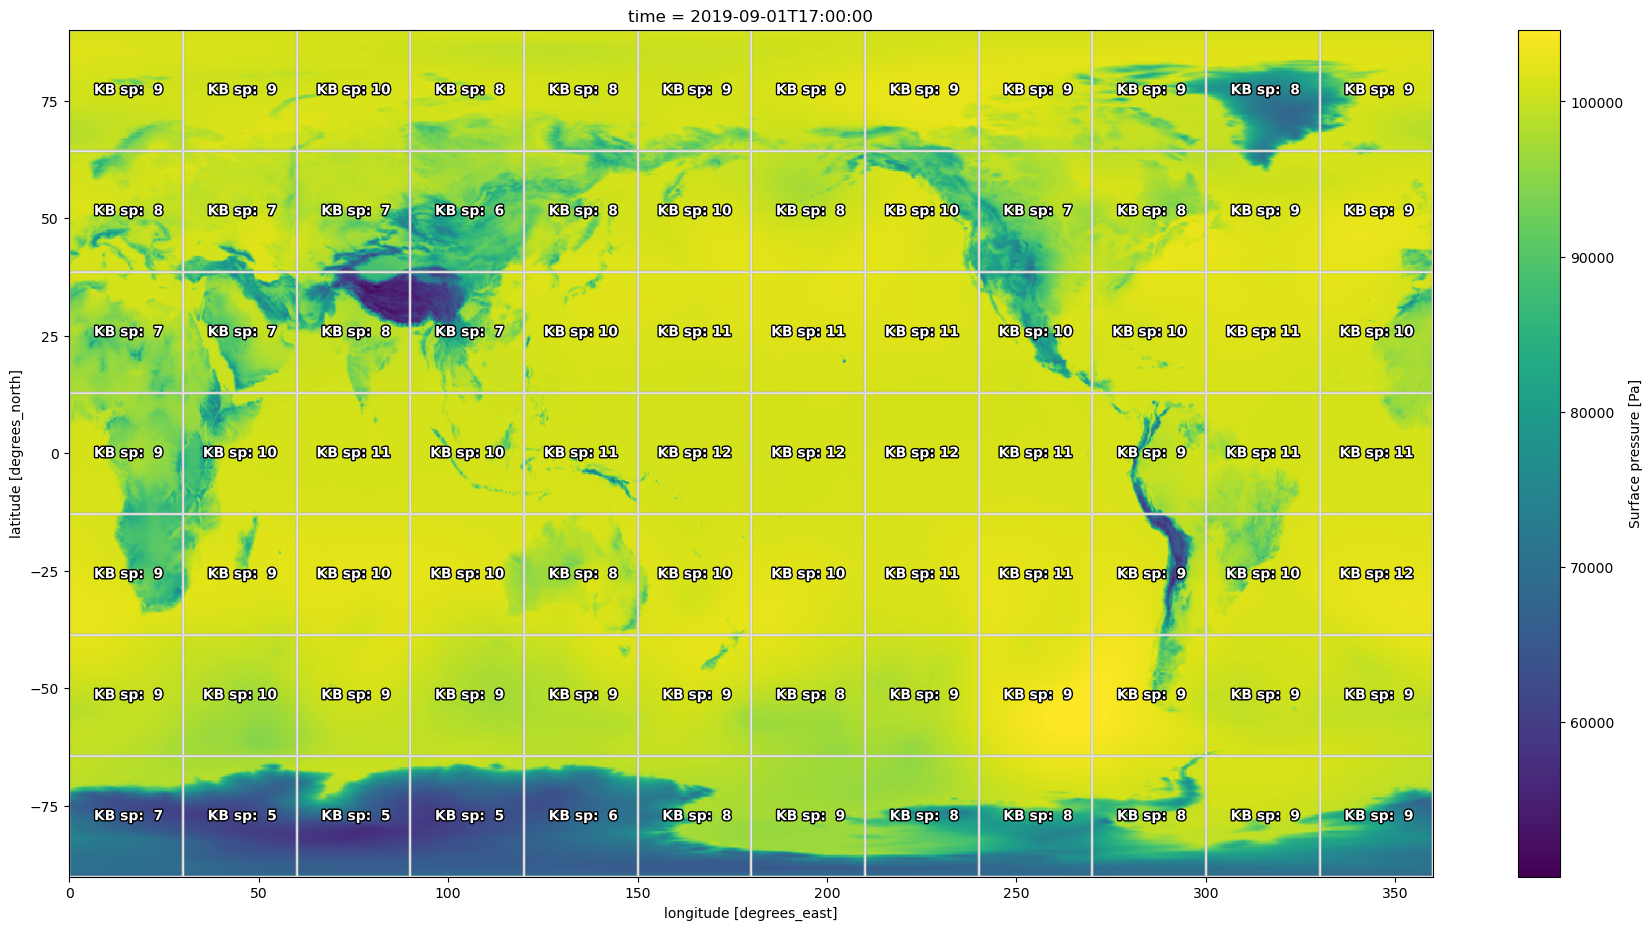

In [35]:
fig, ax = plt.subplots(figsize=(22, 11))
        
ds['sp'].plot(ax=ax)

for i in range(len(dss_bitrounded)):
    x = float(min(dss[i].longitude[0], dss[i].longitude[-1]))
    y = float(min(dss[i].latitude[0], dss[i].latitude[-1]))
    w = float(abs(dss[i].longitude[0] - dss[i].longitude[-1]))
    h = float(abs(dss[i].latitude[0] - dss[i].latitude[-1]))
    rect = mpl.patches.Rectangle((x, y), width = w, height = h,
                                facecolor = "none", edgecolor = "#E5E4E2",
                                path_effects=[pe.withStroke(linewidth=1, foreground="gray")],
                                label='xxx')
    ax.add_patch(rect)
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/2.0
    ax.annotate(
        f"""
        KB sp: {int(dss_kbits[i].sp):2}
        """,
        # I: X{ratios[i]['comp']}
        # II: X{ratios[i]['bitr_comp']}
        # """,
        (cx+10, cy), color='w', weight='bold', fontsize=10, ha='right', va='center',
        path_effects=[pe.withStroke(linewidth=2, foreground='k')]
    )

fig.show()

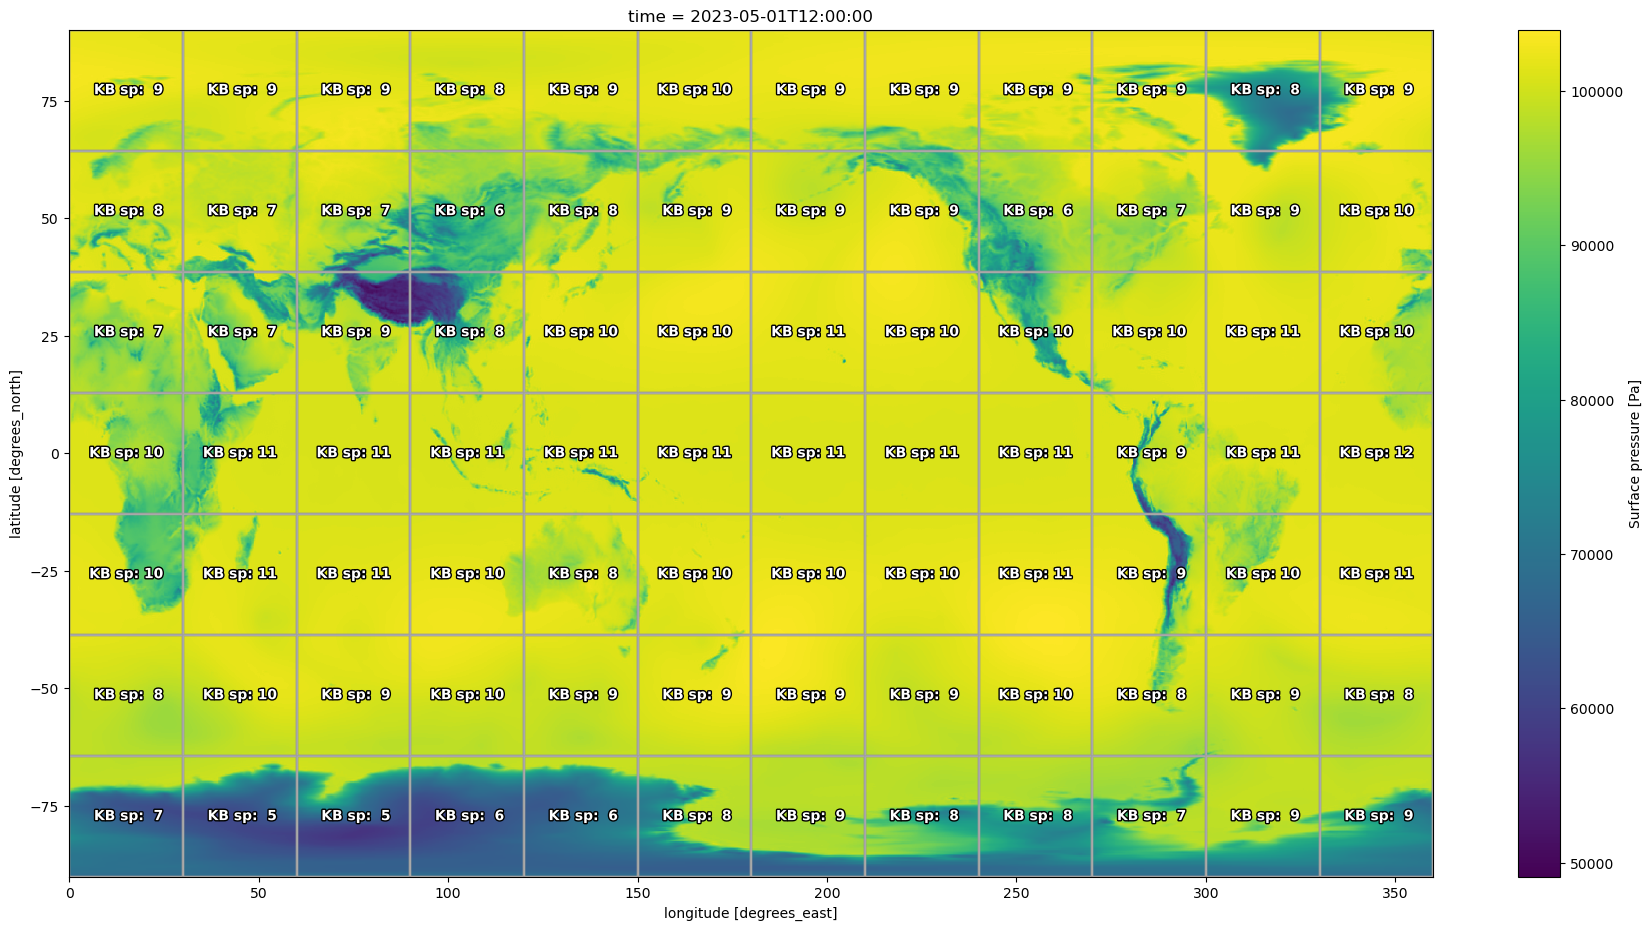

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe

fig, ax = plt.subplots(figsize=(22, 11))
        
ds.isel(time=0)['sp'].plot(ax=ax)

for i in range(len(dss_bitrounded)):
    x = float(min(dss[i].longitude[0], dss[i].longitude[-1]))
    y = float(min(dss[i].latitude[0], dss[i].latitude[-1]))
    w = float(abs(dss[i].longitude[0] - dss[i].longitude[-1]))
    h = float(abs(dss[i].latitude[0] - dss[i].latitude[-1]))
    rect = mpl.patches.Rectangle((x, y), width = w, height = h,
                                facecolor = "none", edgecolor = "darkgray",
                                path_effects=[pe.withStroke(linewidth=1, foreground="gray")],
                                label='xxx')
    ax.add_patch(rect)
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/2.0
    ax.annotate(
        f"""
        KB sp: {int(dss_kbits[i].sp):2}
        """,
        # I: X{ratios[i]['comp']}
        # II: X{ratios[i]['bitr_comp']}
        # """,
        (cx+10, cy), color='w', weight='bold', fontsize=10, ha='right', va='center',
        path_effects=[pe.withStroke(linewidth=2, foreground='k')]
    )

fig.show()